In [2]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Description**

**Train.csv** - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

**PassengerId** - Id for each passenger in the test set.

**Transported** - The target. For each passenger, predict either True or False.

# Data Cleaning

In [3]:
# Overview of the train dataset
df_train = pd.read_csv('train.csv')
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Overview of the test dataset
df_test = pd.read_csv('test (1).csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# Checking the shape of the dataset
print(df_train.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


In [6]:
# Merging the two dataset
titanic = pd.concat([df_train, df_test])

In [7]:
titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [8]:
# Overview of the titanic dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [9]:
# A description of the dataset
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# Checking the description of all the columns in the dataset
titanic.describe(include= 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,12970,12682,12660,12671,12696,12700.000000,12674,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12676,8693
unique,12970,3,2,9825,3,NaN,2,NaN,NaN,NaN,NaN,NaN,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Carry Contrevins,True
freq,1,6865,8079,8,8871,NaN,12401,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.771969,NaN,222.897852,451.961675,174.906033,308.476904,306.789482,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.387261,NaN,647.596664,1584.370747,590.558690,1130.279641,1180.097223,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,49.000000,77.000000,29.000000,57.000000,42.000000,NaN,NaN


We tried merging the dataset for visualization because the test data makes up over 30% of our dataset; however, we concluded that the transported column which is absent in our test dataset is very essential to the visualization as it is the dependent variable. Since the train data set made up about 67 % of our dataset, we decided we may be able to rely on the conclusions of the visualization using the train data alone.

In [11]:
# Assigning a variable to the train dataset
df_titanic= df_train

In [12]:
# Checking for null values 
print(df_titanic.isnull().sum())

print('.........................')

print(df_test.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
.........................
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [13]:
# Checking for unique values in passenger ID
df_train.PassengerId.unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [14]:
df_titanic.PassengerId.value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [15]:
# Checking for the length of unique values in passebeger ID
len(df_titanic.PassengerId.unique())

8693

In [16]:
# Checking for unique values in Name (fill with unknown)
df_titanic.Name.unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

In [17]:
# Checking for length of unique values in Name
len(df_titanic.Name.unique())

8474

In [18]:
# Checking for duplicated values in Name
df_titanic['Name'].duplicated().value_counts()

False    8474
True      219
Name: Name, dtype: int64

In [19]:
# Extracting the group part of the passenger ID
df_titanic['passengerGroup'] = df_titanic.PassengerId.str.split('_').str[0]
df_test['passengerGroup'] = df_test.PassengerId.str.split('_').str[0]

In [20]:
# Converting Passenger ID to integer
#df_titanic['PassengerId'] = df_titanic['PassengerId'].astype(int)
#df_test['PassengerId'] = df_test['PassengerId'].astype(int)

In [21]:
# Converting Passenger ID to integer
df_titanic['passengerGroup'] = df_titanic['passengerGroup'].astype(int)
df_test['passengerGroup'] = df_test['passengerGroup'].astype(int)

In [22]:
#c Checking for the number of unique values in cabin
len(df_titanic.Cabin.unique())

6561

In [23]:
df_titanic.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [24]:
# Checking for the value count 
df_titanic.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [25]:
# Splitting Cabin into different units for better visualization
df_titanic['cabinDeck'] = df_titanic.Cabin.str.split('/').str[0]
df_titanic['cabinNum']  = df_titanic.Cabin.str.split('/').str[1]
df_titanic['cabinSide'] = df_titanic.Cabin.str.split('/').str[2]

In [26]:
# Splitting Cabin into different units for better visualization
df_test['cabinDeck'] = df_test.Cabin.str.split('/').str[0]
df_test['cabinNum']  = df_test.Cabin.str.split('/').str[1]
df_test['cabinSide'] = df_test.Cabin.str.split('/').str[2]

In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8494 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age             8514 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8512 non-null   float64
 8   FoodCourt       8510 non-null   float64
 9   ShoppingMall    8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  passengerGroup  8693 non-null   int64  
 15  cabinDeck       8494 non-null   object 
 16  cabinNum        8494 non-null   object 
 17  cabinSide       8494 non-null   o

In [28]:
# Exploring Cabin Num
df_titanic.cabinNum.value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: cabinNum, Length: 1817, dtype: int64

In [29]:
df_titanic.cabinNum.unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [30]:
len(df_titanic.cabinNum.unique())

1818

In [31]:
# Converting Cabin Num to float
df_titanic['cabinNum'] = df_titanic['cabinNum'].astype(float)
df_test['cabinNum'] = df_test['cabinNum'].astype(float)

In [32]:
# Dropping the cabin column
df_titanic.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [33]:
df_titanic.sample(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
4035,4309_02,Earth,False,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Carlie Whitledges,True,4309,G,709.0,P
15,0012_01,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,12,NaN,NaN,NaN
4153,4438_01,Mars,False,TRAPPIST-1e,36.0,False,721.0,0.0,471.0,0.0,0.0,Salros Wate,False,4438,F,910.0,P
7727,8247_01,Europa,False,TRAPPIST-1e,23.0,False,0.0,2984.0,23.0,686.0,173.0,NaN,True,8247,D,258.0,P
3511,3772_02,Earth,False,TRAPPIST-1e,20.0,False,0.0,NaN,422.0,0.0,0.0,Tany Castron,True,3772,F,777.0,P


In [34]:
# Checking for unique values in home planet 
len(df_titanic.HomePlanet.unique())

4

In [35]:
df_titanic.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [36]:
# Checking for the value count (fill with mode)
df_titanic.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [37]:
# Checking for unique values in cryosleep 
len(df_titanic.CryoSleep.unique())

3

In [38]:
df_titanic.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [39]:
# Checking for the value count (fill with mode)
df_titanic.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [40]:
# Checking for the number of unique values in Destination
len(df_titanic.Destination.unique())

4

In [41]:
df_titanic.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [42]:
# Checking for the value count (fill with mode)
df_titanic.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [43]:
# Checking for the number of unique values in VIP
len(df_titanic.VIP.unique())

3

In [44]:
df_titanic.VIP.unique()

array([False, True, nan], dtype=object)

In [45]:
# Checking for the value count (fill with mode)
df_titanic.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

Text(0, 0.5, 'ShoppingMall')

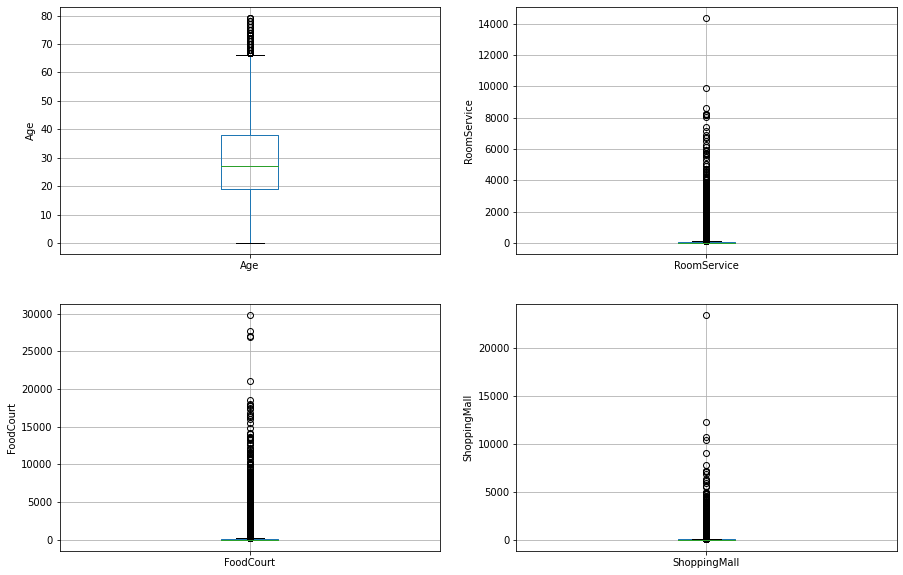

In [46]:
# Plotting a box plot to check for outliers
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_titanic.boxplot(column='Age')
fig.set_ylabel('Age')

plt.subplot(2,2,2)
fig = df_titanic.boxplot(column='RoomService')
fig.set_ylabel('RoomService')

plt.subplot(2,2,3)
fig = df_titanic.boxplot(column='FoodCourt')
fig.set_ylabel('FoodCourt')

plt.subplot(2,2,4)
fig = df_titanic.boxplot(column='ShoppingMall')
fig.set_ylabel('ShoppingMall')

Text(0, 0.5, 'cabinNum')

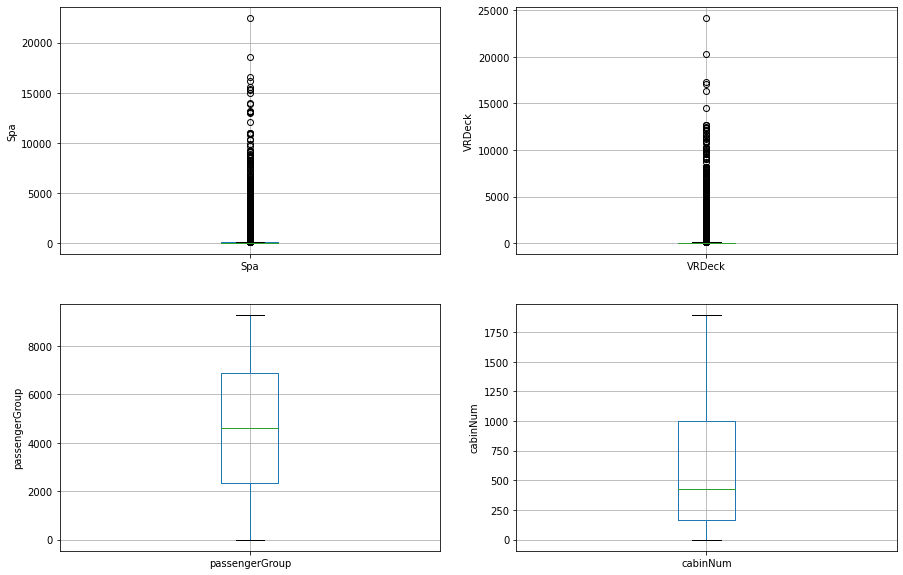

In [47]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_titanic.boxplot(column='Spa')
fig.set_ylabel('Spa')

plt.subplot(2,2,2)
fig = df_titanic.boxplot(column='VRDeck')
fig.set_ylabel('VRDeck')

plt.subplot(2,2,3)
fig = df_titanic.boxplot(column='passengerGroup')
fig.set_ylabel('passengerGroup')

plt.subplot(2,2,4)
fig = df_titanic.boxplot(column='cabinNum')
fig.set_ylabel('cabinNum')

In [48]:
df_titanic.sample(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
7206,7698_01,Mars,False,TRAPPIST-1e,39.0,False,332.0,0.0,728.0,2.0,86.0,Beres Derte,True,7698,F,1602.0,P
6337,6707_01,Earth,True,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Scotte Thomason,True,6707,G,1091.0,S
6222,6582_01,Europa,False,55 Cancri e,25.0,False,0.0,1538.0,97.0,530.0,35.0,Sitron Platch,False,6582,A,66.0,P


**Filling null values in columns:**

No null values for PassengerId

The null values in the Homeplanet will be filled with mode of the column

The null values in the CryoSleep will be filled with mode of the column

The null values in the Cabin will be filled with Not Specified

The null values in the Destination will be filled mode of the column

The null values in the VIP will be filled mode of the column

The null values in the cabinDeck will be filled mode of the column

The null values in the cabinSide will be filled mode of the column

The null values in the Name will be filled with Unknown

The null values in the Age will be filled with mean of the column as there are limited outliers

The null values in the cabinNum will be filled with mean of the column as there are limited outliers

The null values in the RoomService will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the FoodCourt will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the ShoppingMall will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the Spa will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the VRdeck will be filled with median of the column as there are plenty outliers and median is robust to outliers




In [49]:
df_titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,NaN,NaN,NaN,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0


In [50]:
# Filling null values
df_titanic['HomePlanet'] = df_titanic['HomePlanet'].fillna(df_titanic['HomePlanet'].mode()[0])
df_titanic['CryoSleep'] = df_titanic['CryoSleep'].fillna(df_titanic['CryoSleep'].mode()[0])
df_titanic['Destination'] = df_titanic['Destination'].fillna(df_titanic['Destination'].mode()[0])
df_titanic['VIP'] = df_titanic['VIP'].fillna(df_titanic['VIP'].mode()[0])
df_titanic['cabinDeck'] = df_titanic['cabinDeck'].fillna(df_titanic['cabinDeck'].mode()[0])
df_titanic['cabinSide'] = df_titanic['cabinSide'].fillna(df_titanic['cabinSide'].mode()[0])

In [51]:
# Filling null values
df_titanic['Name'] = df_titanic['Name'].fillna('Unknown')

In [52]:
# Filling null values
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['cabinNum'] = df_titanic['cabinNum'].fillna(df_titanic['cabinNum'].mean())
df_titanic['RoomService'] = df_titanic['RoomService'].fillna(df_titanic['RoomService'].median())
df_titanic['FoodCourt'] = df_titanic['FoodCourt'].fillna(df_titanic['FoodCourt'].median())
df_titanic['ShoppingMall'] = df_titanic['ShoppingMall'].fillna(df_titanic['ShoppingMall'].median())
df_titanic['Spa'] = df_titanic['Spa'].fillna(df_titanic['Spa'].median())
df_titanic['VRDeck'] = df_titanic['VRDeck'].fillna(df_titanic['VRDeck'].median())

In [53]:
# Filling null values in the test dataset
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])
df_test['cabinDeck'] = df_test['cabinDeck'].fillna(df_test['cabinDeck'].mode()[0])
df_test['cabinSide'] = df_test['cabinSide'].fillna(df_test['cabinSide'].mode()[0])
df_test['Name'] = df_test['Name'].fillna('Unknown')
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['cabinNum'] = df_test['cabinNum'].fillna(df_test['cabinNum'].mean())
df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].median())
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].median())
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median())
df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].median())
df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].median())

In [54]:
# Ensuring all null values have been filled
print(df_titanic.isnull().sum())
print('.........................')
print(df_test.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
passengerGroup    0
cabinDeck         0
cabinNum          0
cabinSide         0
dtype: int64
.........................
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
passengerGroup    0
cabinDeck         0
cabinNum          0
cabinSide         0
dtype: int64


In [55]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   bool   
 3   Destination     8693 non-null   object 
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Name            8693 non-null   object 
 12  Transported     8693 non-null   bool   
 13  passengerGroup  8693 non-null   int64  
 14  cabinDeck       8693 non-null   object 
 15  cabinNum        8693 non-null   float64
 16  cabinSide       8693 non-null   object 
dtypes: bool(3), float64(7), int64(1),

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   object 
 1   HomePlanet      4277 non-null   object 
 2   CryoSleep       4277 non-null   bool   
 3   Destination     4277 non-null   object 
 4   Age             4277 non-null   float64
 5   VIP             4277 non-null   bool   
 6   RoomService     4277 non-null   float64
 7   FoodCourt       4277 non-null   float64
 8   ShoppingMall    4277 non-null   float64
 9   Spa             4277 non-null   float64
 10  VRDeck          4277 non-null   float64
 11  Name            4277 non-null   object 
 12  passengerGroup  4277 non-null   int64  
 13  cabinDeck       4277 non-null   object 
 14  cabinNum        4277 non-null   float64
 15  cabinSide       4277 non-null   object 
dtypes: bool(2), float64(7), int64(1), object(6)
memory usage: 476.3+ KB


In [57]:
df_titanic.Destination.value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

From the above visualizations, it can be concluded that the passengers' chances of being transported to another dimension is quite random and nothing from the dataset spectacularly influenced the passengers chance of being transported to another dimension. Other than the cryosleep whihc has but a weak relationship.

# Data Visualization

In [58]:
df_titanic.sample(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
7849,8377_01,Mars,False,TRAPPIST-1e,40.0,False,963.0,14.0,320.0,1.0,0.0,Pon Meau,False,8377,E,537.0,P
6580,6944_01,Europa,True,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Alzird Gented,True,6944,C,223.0,P
96,0103_02,Earth,True,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True,103,G,18.0,S
6613,6977_02,Earth,False,TRAPPIST-1e,38.0,False,0.0,806.0,3.0,0.0,0.0,Jeret Burker,True,6977,G,1137.0,S
2133,2289_01,Mars,False,TRAPPIST-1e,37.0,False,20.0,0.0,2559.0,20.0,0.0,Hary Jaff,True,2289,F,465.0,P


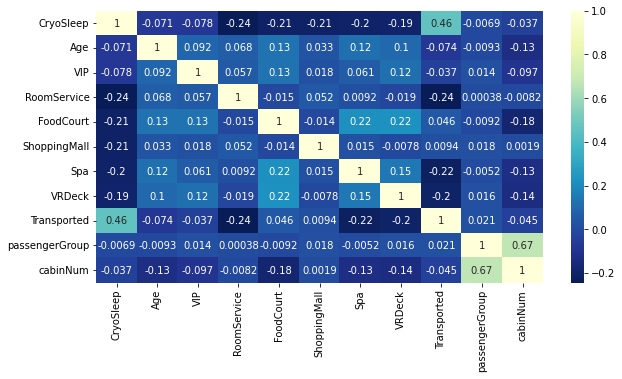

In [59]:
# Plotting a correlation heatmap
plt.figure(figsize= (10,5))
sns.heatmap(df_titanic.corr(), cmap='YlGnBu_r', annot=True)

In [60]:
# Checking the value counts of the homeplanet column
df_titanic.HomePlanet.value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

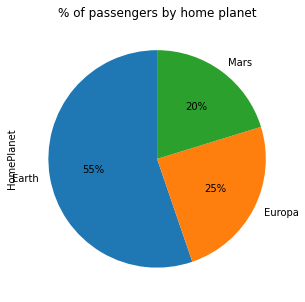

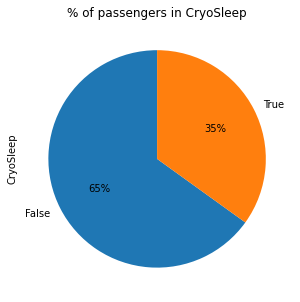

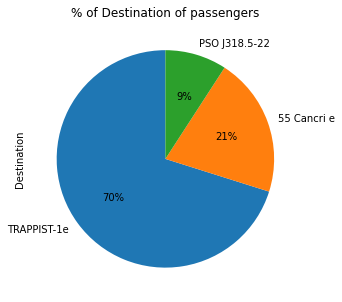

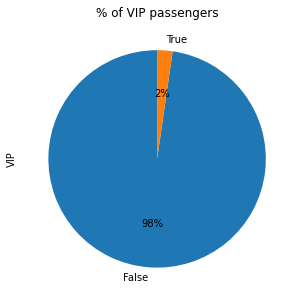

In [61]:
ax1 = df_titanic['HomePlanet'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              labels=df_titanic['HomePlanet'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax1.set_title('% of passengers by home planet', fontsize = 12)
plt.show()

ax2 = df_titanic['CryoSleep'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax2.set_title('% of passengers in CryoSleep', fontsize = 12)
plt.show()

ax3 = df_titanic['Destination'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10,
                                               labels=df_titanic['Destination'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax3.set_title('% of Destination of passengers', fontsize = 12)
plt.show()

ax4 = df_titanic['VIP'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10,
                                               labels=df_titanic['VIP'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax4.set_title('% of VIP passengers', fontsize = 12)
plt.show()

#plt.legend(loc='upper left');

In [62]:
#fig, axes = plt.subplots(1, 3)

#axes[0].plot(df_titanic['HomePlanet'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              #labels=df_titanic['HomePlanet'].value_counts().index, startangle=90, autopct='%1.0f%%')
#axes[0].set_title('% of passengers by home planet', fontsize = 12)

#axes[1].plot(df_titanic['CryoSleep'].value_counts(), kind='pie', figsize=(5,5), fontsize=10, 
                                              #labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
#axes[1].set_title('% of passengers in CryoSleep', fontsize = 12)

#axes[2].plot(df_titanic['Destination'].value_counts(), kind='pie', figsize=(5,5), fontsize=10,
                                               #startangle=90, autopct='%1.0f%%')
#axes[2].set_title('% of Destination of passengers', fontsize = 12)

#axes[3].plot(df_titanic['VIP'].value_counts(), kind='pie', figsize=(5,5), fontsize=10,
                                               #startangle=90, autopct='%1.0f%%')
#axes[3].set_title('% of VIP passengers', fontsize = 12)

#plt.legend(loc='upper left');

#plt.show()

Text(0.5, 1.0, 'VIP')

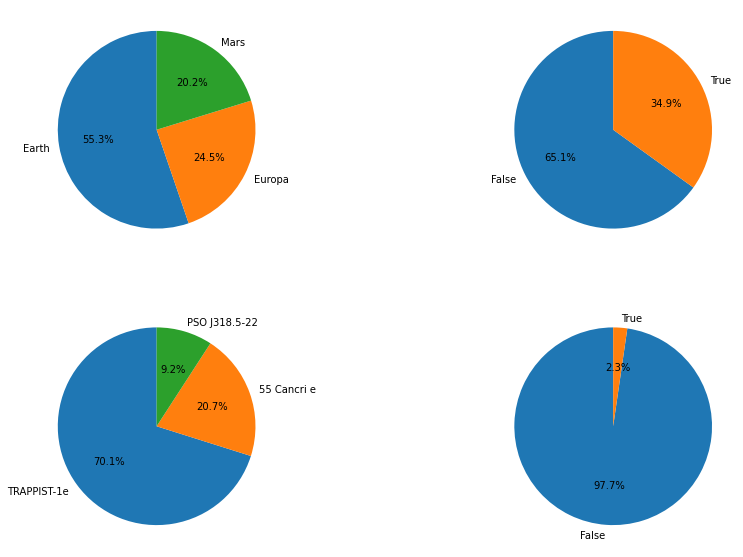

In [63]:
fig, ax = plt.subplots(figsize =(15, 10))

plt.subplot(2,2,1)
fig = plt.pie(df_titanic['HomePlanet'].value_counts(), 
        labels=df_titanic['HomePlanet'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
#fig.set_title('HomePlanet')

plt.subplot(2,2,2)
fig = plt.pie(df_titanic['CryoSleep'].value_counts(), 
        labels=df_titanic['CryoSleep'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax2.set_title('CryoSleep')

plt.subplot(2,2,3)
fig = plt.pie(df_titanic['Destination'].value_counts(), 
        labels=df_titanic['Destination'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax3.set_title('Destination')

plt.subplot(2,2,4)
fig = plt.pie(df_titanic['VIP'].value_counts(), 
        labels=df_titanic['VIP'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax4.set_title('VIP')

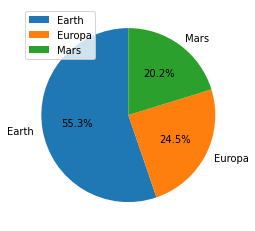

In [64]:
# Plotting a pie chart for the homeplanet
plt.pie(df_titanic['HomePlanet'].value_counts(), 
        labels=df_titanic['HomePlanet'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

More than half of the people on the spacaship are from planet Earth and approximately 21% and 24% Mars and Europa respectively.

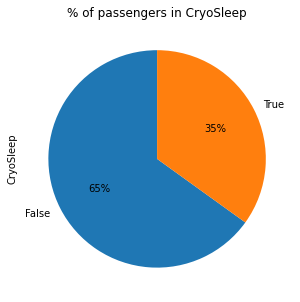

In [65]:
# Percentage who uses cryosleep
df_titanic['CryoSleep'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
plt.title('% of passengers in CryoSleep', fontsize = 12)
plt.show()

A large perecentage of the passengers did not use the CryoSleep

In [66]:
df_tit = df_titanic.drop(['PassengerId'], axis=1)

In [67]:
# Grouping by cryosleep
df = df_tit.groupby('CryoSleep')
df.mean()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,passengerGroup,cabinNum
CryoSleep,,,,,,,,,,
False,29.571130,0.031471,338.143741,689.221535,260.62447,468.138437,458.414074,0.335042,4646.860149,613.942412
True,27.443823,0.006915,0.000000,0.000000,0.00000,0.000000,0.000000,0.817583,4608.302601,575.086561


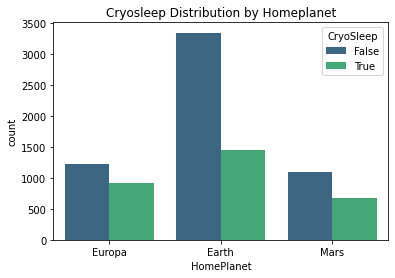

In [68]:
# Visualing usage of cryosleep by planet 
sns.countplot(x='HomePlanet', hue= 'CryoSleep', data= df_titanic, palette= 'viridis' )
plt.title("Cryosleep Distribution by Homeplanet")
plt.show()

Passengers from earth have the highest number of people who did and didn't use the cryosleep; this makes sense because earth has the highest percentage of passengers aboard the spaceship. However, while roughly the same proportion of people from Europa and Mars did not use the cryosleep, Residents of Europa explore the use of the cryosleep more than people from Mars. 

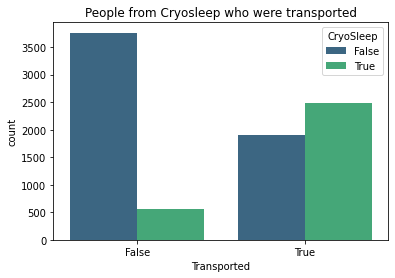

In [69]:
sns.countplot(x='Transported', hue= 'CryoSleep', data= df_titanic, palette= 'viridis' )
plt.title("People from Cryosleep who were transported")
plt.show()

Most people who did not use the CryoSleep were not transported while a larger number of people who use the cryosleep were transported to destinations other thabn their preferred ones. 

In [70]:
# Checking the destination of passengers on the spaceship
dest = df_titanic['Destination'].value_counts()
dest

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [71]:
# Checking destination by %
dest_rate = df_titanic['Destination'].value_counts() / 12970
dest_rate

TRAPPIST-1e      0.470085
55 Cancri e      0.138782
PSO J318.5-22    0.061372
Name: Destination, dtype: float64

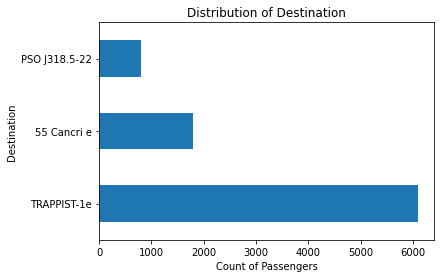

In [72]:
# Visualizing destination
dest.plot(kind='barh')
plt.xlabel('Count of Passengers')
plt.ylabel('Destination')
plt.title('Distribution of Destination');

TRAPPIST-1e is the most preferred destination by passenegers on the titanic spaceship whereas PSO J318.5-22 is the least preferred destination. 

In [73]:
# Checking destination by home planet
df_dest = df_titanic[['HomePlanet', 'Destination']].value_counts()
df_dest

HomePlanet  Destination  
Earth       TRAPPIST-1e      3354
Mars        TRAPPIST-1e      1517
Europa      TRAPPIST-1e      1226
            55 Cancri e       886
Earth       PSO J318.5-22     728
            55 Cancri e       721
Mars        55 Cancri e       193
            PSO J318.5-22      49
Europa      PSO J318.5-22      19
dtype: int64

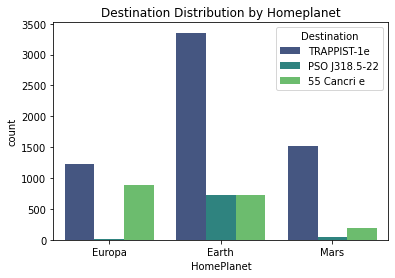

In [74]:
# Visualizing destination by home planet
sns.countplot(x='HomePlanet', hue= 'Destination', data= df_titanic, palette= 'viridis' )
plt.title("Destination Distribution by Homeplanet")
plt.show()

In [75]:
home_destination = pd.pivot_table(data=df_titanic, columns=['HomePlanet'], index=['Destination'], values=['cabinDeck'], aggfunc='count')
home_destination

cabinDeck             
HomePlanet        Earth Europa  Mars
Destination                         
55 Cancri e         721    886   193
PSO J318.5-22       728     19    49
TRAPPIST-1e        3354   1226  1517

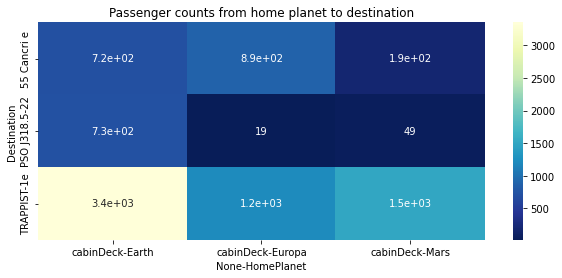

In [76]:
plt.figure(figsize=(10,4))
home_destination = pd.pivot_table(data=df_titanic, columns=['HomePlanet'], index=['Destination'], values=['cabinDeck'], aggfunc='count')
sns.heatmap(home_destination,cmap='YlGnBu_r', annot=True).set_title('Passenger counts from home planet to destination')
plt.show()

TRAPPIST-1e is the highest chosen destination in all the planets. This is not surprising because a large percentage of the passsegers are going to TRAPPIST-1e. However, PSO J318.5-22 is the least preferred destination by both Mars and Europa residents as less than 100 passengers are going to this location, while PSO J318.5-22 and  55 Cancri e have equal number of people visiting from earth. 



In [77]:
# Creating a dataframe for the count of people transported from different homeplanet
transported = df_titanic[['HomePlanet', 'Transported']].value_counts()
transported

HomePlanet  Transported
Earth       False          2749
            True           2054
Europa      True           1404
Mars        True            920
            False           839
Europa      False           727
dtype: int64

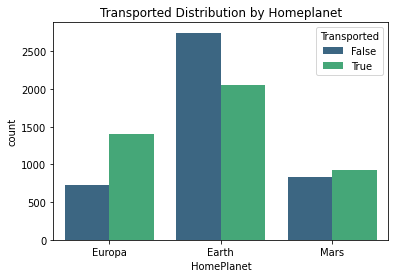

In [78]:
# PLotting a count plot for home planet distribution by transported
sns.countplot(x='HomePlanet', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

Most earth residents were not transported to another dimension, whereas a higher number of passengers from Europa and Mars were transported to a dimension different from their desired destination. Europa has, shockingly,  the highest number of people transported to another dimension.

**this make us want to look at which cabin they occupy, the age group travelling, from this planet and whether they mostly travel as a group or an individual.**

In [79]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
6492,6853_01,Europa,False,55 Cancri e,31.0,False,0.0,1604.0,4058.0,4094.0,124.0,Menkaa Cathome,False,6853,C,218.0,P
1328,1406_01,Mars,False,TRAPPIST-1e,17.0,False,36.0,0.0,1013.0,0.0,0.0,Muffs Gres,False,1406,E,106.0,S


In [80]:
# Checking if there is a correlation between the age and people transported to a different dimension
age_titanic = df_titanic[['Age', 'Transported']]

In [81]:
age_titanic

,Age,Transported
0,39.0,False
1,24.0,True
2,58.0,False
3,33.0,False
4,16.0,True
...,...,...
8688,41.0,False
8689,18.0,False
8690,26.0,True
8691,32.0,False


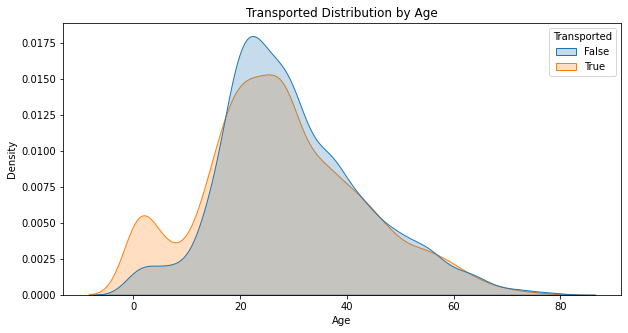

In [82]:
# A KDE plot comparing age and trasnported
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'Transported', data= age_titanic, color= 'b', shade=True)
plt.title("Transported Distribution by Age")
plt.show()

Most of the children are kept in the cryosleep and this is understandable because it is most likely for safety.

In [83]:
# Checking for relationship between age and transported
cryosleep_age = df_titanic[['Age', 'CryoSleep']]
cryosleep_age

,Age,CryoSleep
0,39.0,False
1,24.0,False
2,58.0,False
3,33.0,False
4,16.0,False
...,...,...
8688,41.0,False
8689,18.0,True
8690,26.0,False
8691,32.0,False


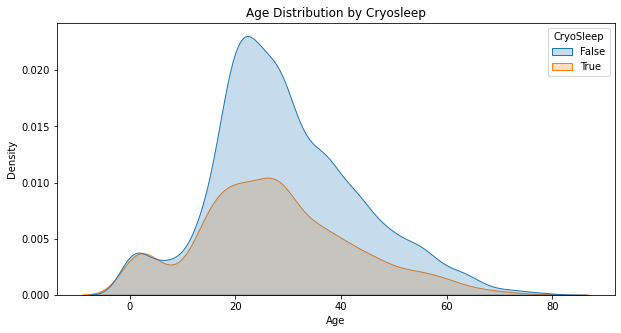

In [84]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'CryoSleep', data= cryosleep_age, color= 'b', shade=True)
plt.title("Age Distribution by Cryosleep")
plt.show()

Surprisingly, the cryosleeep was mainly used by people within the age range 30 years and below. Although ages 20-30 yrs are approximately the largest age group on the spaceship, it is least expected that they will prefer to stay alone and not explore the luxury the spaceship has to offer.

In [85]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
1612,1709_05,Mars,True,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Fams Minen,True,1709,F,326.0,S
6140,6478_01,Mars,False,TRAPPIST-1e,29.0,False,1290.0,0.0,6.0,1.0,0.0,Cole Hac,False,6478,E,412.0,P


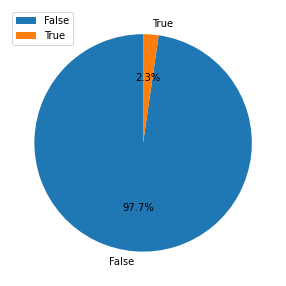

In [86]:
# Plotting a pie chart for the homeplanet
plt.figure(figsize=(10, 5))

plt.pie(df_titanic['VIP'].value_counts(), 
        labels=df_titanic['VIP'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

Significant proportion of the passenger did not opt for the VIP service. Just 2% of the passengers aboard the spaceship in VIP.

In [87]:
# Checking for a relationship between VIP users and transported
VIP = df_titanic[['VIP', 'Transported']].value_counts()
VIP

VIP    Transported
False  True           4302
       False          4192
True   False           123
       True             76
dtype: int64

In [88]:
# CReating a dataframe with age and vip columns
age = pd.DataFrame(df_titanic[['Age', 'VIP']])
age

,Age,VIP
0,39.0,False
1,24.0,False
2,58.0,True
3,33.0,False
4,16.0,False
...,...,...
8688,41.0,True
8689,18.0,False
8690,26.0,False
8691,32.0,False


In [89]:
# Putting the age column in a bin for better visualization
age['age_bins'] = pd.cut(x=age['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [90]:
age.head(4)

,Age,VIP,age_bins
0,39.0,False,"(30, 40]"
1,24.0,False,"(20, 30]"
2,58.0,True,"(50, 60]"
3,33.0,False,"(30, 40]"


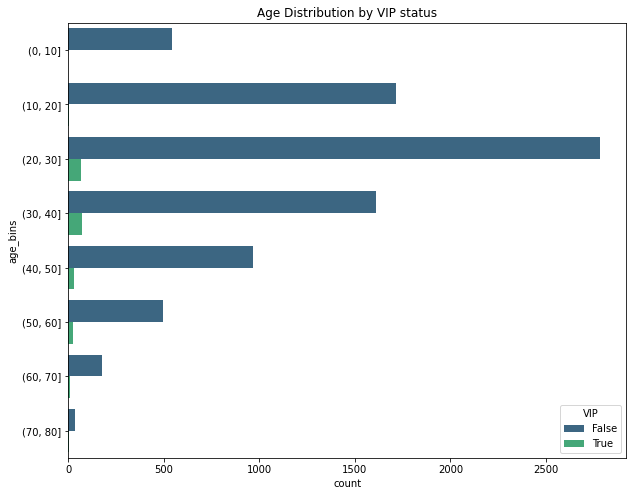

In [91]:
plt.figure(figsize=(10, 8))
sns.countplot(y='age_bins', hue= 'VIP', data= age, palette= 'viridis')
plt.title("Age Distribution by VIP status")
plt.show()

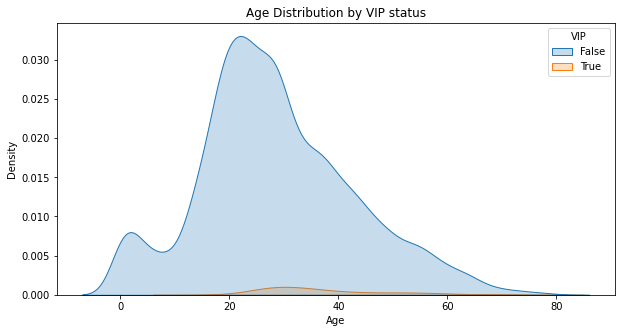

In [92]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'VIP', data= df_titanic, color= 'b', shade=True)
plt.title("Age Distribution by VIP status")
plt.show()

The VIP service was majorly used by people between ages 20 - 40 years. This is unexpected as one would think that people 40years and above will prefer the VIP section mostly for privacy and comfort

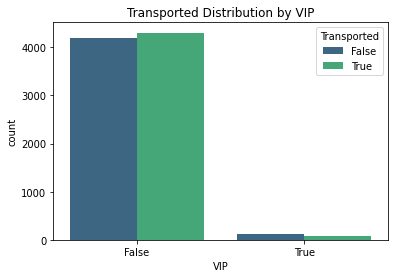

In [93]:
# PLotting a countplot for transported distribution by VIP
sns.countplot(x='VIP', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by VIP")
plt.show()

The VIP section seem to have offered a bit of protection as more people using this service were not transported to a different dimension. Whereas, if only by a marginal distance, more people in the non-VIP section were transported to a different dimension than thier desired location.

In [94]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
8418,8989_04,Europa,False,55 Cancri e,29.0,False,80.0,3707.0,0.0,1465.0,1320.0,Minon Invebodene,False,8989,B,291.0,P
1975,2111_01,Mars,False,TRAPPIST-1e,24.0,False,600.0,593.0,1404.0,0.0,1.0,Beals Blan,False,2111,F,417.0,P


Text(0.5, 1.0, 'Distribution of passengerGroup by Transported')

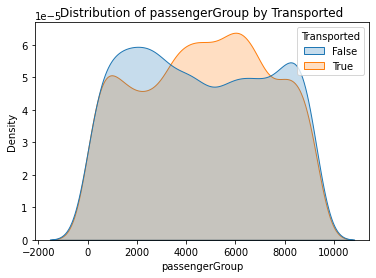

In [95]:
sns.kdeplot(x='passengerGroup', hue= 'Transported', data= df_titanic, color= 'b', shade=True)
plt.title('Distribution of passengerGroup by Transported')

People within the passenger group 3 to 7 were more transported to another dimension while people within group 1-2 and 8 are less transported. 

Text(0, 0.5, 'Spa')

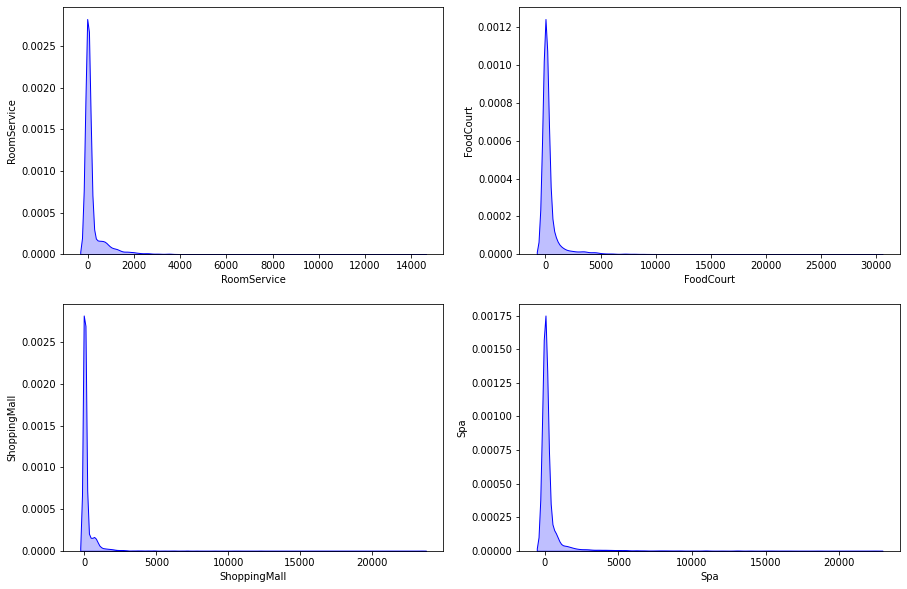

In [96]:
# PLotting a subplot for the various services used on the spaceship
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.kdeplot(x='RoomService', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('RoomService')

plt.subplot(2,2,2)
fig = sns.kdeplot(x='FoodCourt', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('FoodCourt')

plt.subplot(2,2,3)
fig = sns.kdeplot(x='ShoppingMall', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('ShoppingMall')

plt.subplot(2,2,4)
fig = sns.kdeplot(x='Spa', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('Spa')

Most of the passengers on the spaceship hardly used any of the paid services

Text(0, 0.5, 'cabinNum')

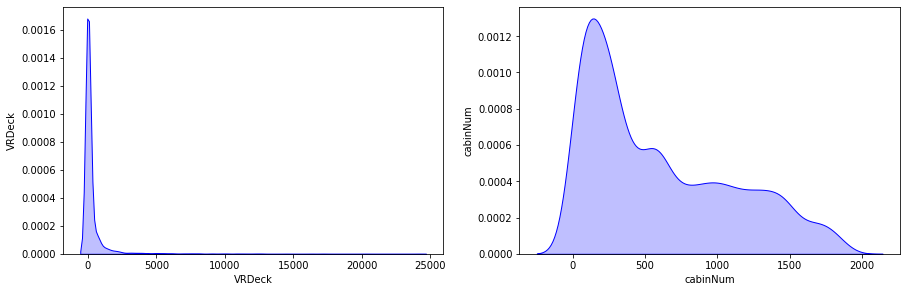

In [97]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.kdeplot(x='VRDeck', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('VRDeck')

plt.subplot(2,2,2)
fig = sns.kdeplot(x='cabinNum', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('cabinNum')

From the subplot, it can be inferred that only a few of the passengers used the paid services on the spaceship. Also, the higher the cabin number, the lower the number of the passengers in the cabin

In [98]:
# Checking the cabin side count
cabinside = df_titanic['cabinSide'].value_counts()
cabinside

S    4487
P    4206
Name: cabinSide, dtype: int64

In [99]:
# Checking the cabin deck count
cabindeck = df_titanic['cabinDeck'].value_counts()
cabindeck

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabinDeck, dtype: int64

Text(0, 0.5, 'cabinDeck')

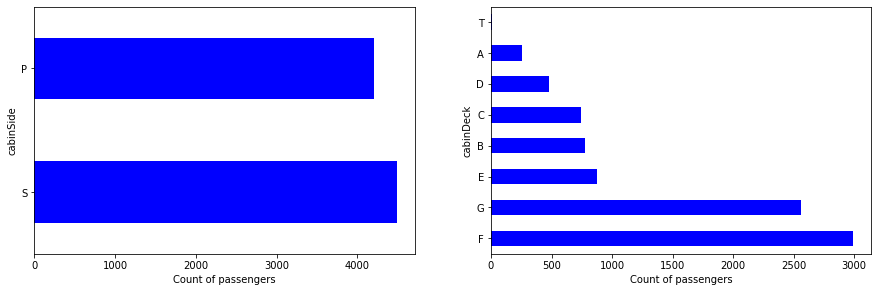

In [100]:
# PLotting a subplot for the cabin side and deck
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = cabinside.plot(kind= 'barh', color= 'b')
plt.xlabel('Count of passengers')
plt.ylabel('Categories')
fig.set_ylabel('cabinSide')

plt.subplot(2,2,2)
fig = cabindeck.plot(kind= 'barh', color= 'b')
plt.xlabel('Count of passengers')
plt.ylabel('cabinDeck')
fig.set_ylabel('cabinDeck')

The starboard (s) is the most preffered cabin side by the passengers surpassing the port (p) only by a slight margin. The Cabin Deck F and G are the most used decks; while T and A are the least used deck. 

In [101]:
# Creating a function that can group the paid services into a single column for each individual
def ServicesTotal(df):
  services = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
  df['Total_services'] = 0
  for col in services:
    df['Total_services'] += df[col]
  return df

ServicesTotal(df_titanic)
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
2112,2266_01,Mars,False,TRAPPIST-1e,30.0,False,616.0,0.0,185.0,210.0,475.0,Dow Conca,False,2266,F,457.0,P,1486.0
5721,6062_02,Mars,False,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,Cranch Sesa,False,6062,E,388.0,P,0.0


In [102]:
# Doing same for test dataset
ServicesTotal(df_test)
df_test.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
3151,6888_04,Europa,False,PSO J318.5-22,25.0,True,5100.0,150.0,0.0,170.0,0.0,Astorux Conablese,6888,C,219.0,P,5420.0
41,0096_01,Earth,False,PSO J318.5-22,30.0,False,1.0,0.0,1585.0,0.0,484.0,Leenny Swanardy,96,F,22.0,S,2070.0


In [103]:
df_vip_serv = df_titanic[['VIP', 'Total_services']]

In [104]:
vip_services = df_vip_serv.groupby('VIP')
vip_services.size()

VIP
False    8494
True      199
dtype: int64

In [105]:
# Comparing the transported columns and the total services used
df_serv_trans = df_titanic[['Transported', 'Total_services']]

In [106]:
# Checking the relationship between the use of paid services and transported
trans_services = df_serv_trans.groupby('Transported')
trans_services.size()

Transported
False    4315
True     4378
dtype: int64

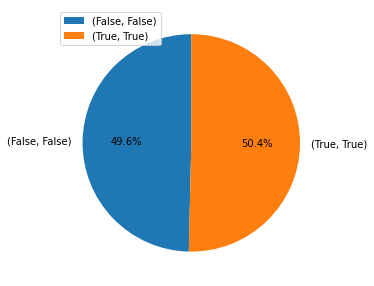

In [107]:
# Creating pie chart for paid services and transported
plt.figure(figsize=(10, 5))

plt.pie(trans_services['Transported'].value_counts(), 
        labels=trans_services['Transported'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

There is no distinct correlation of transported betweeen people who explored teh luxury service available on the spaceship and people who didnt. 

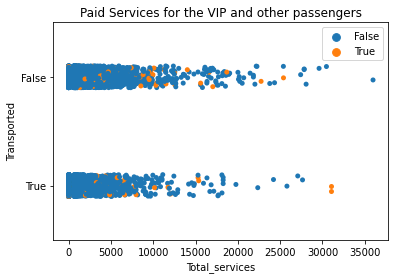

In [108]:
# Plotting a stripplot to assess the relationship between paid services, VIP and Transported
sns.stripplot(data=df_titanic, x='Total_services', hue='VIP', y='Transported', orient='h')
plt.title('Paid Services for the VIP and other passengers')
plt.legend()

Most people who were not transported seem to use the paid services more than their contemporaries. More so, people who used the VIP did not necessarily pay more for these services than other passengers in the ship.




In [109]:
Cabin_Deck = df_titanic['cabinDeck'].value_counts()
Cabin_Deck

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabinDeck, dtype: int64

In [110]:
CabinDeck_Trans = df_titanic[['cabinDeck', 'Transported']]
CabinDeck_Trans

,cabinDeck,Transported
0,B,False
1,F,True
2,A,False
3,A,False
4,F,True
...,...,...
8688,A,False
8689,G,False
8690,G,True
8691,E,False


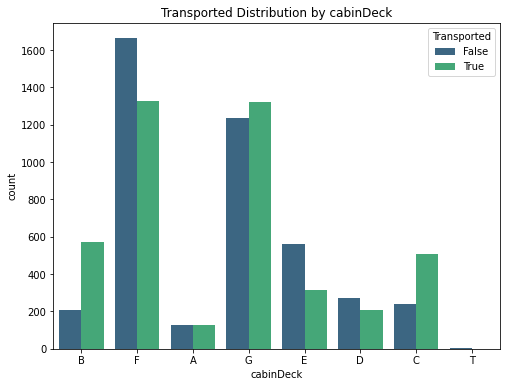

In [111]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabinDeck', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by cabinDeck")
plt.show()

More people from cabinDecks B, G, and C were transported to another dimension; while passenegers from cabin decks F, E, D were less transported. There seem to be no one transported to a different dimension from cabin T while cabin A has equal number of people who were transported and those who were not

Text(0.5, 1.0, 'Cabin Services by VIP')

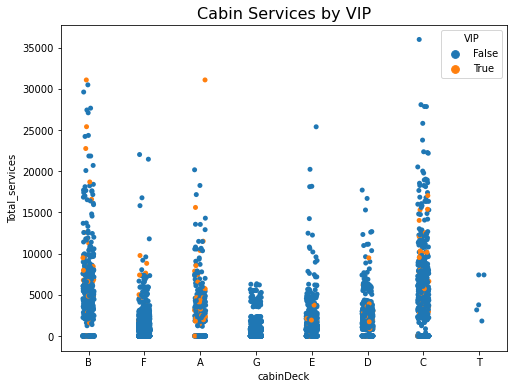

In [112]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df_titanic, x='cabinDeck', y='Total_services', hue='VIP' ).set_title('Cabin Services by VIP', fontsize=16)

While the VIP users were sparsely distributed across the various cabins, Cabins A & T had no VIP users. 

In [113]:
Cabin_Side = df_titanic['cabinSide'].value_counts()
Cabin_Side

S    4487
P    4206
Name: cabinSide, dtype: int64

In [114]:
CabinSide_Trans = df_titanic[['cabinSide', 'Transported']]
CabinSide_Trans

,cabinSide,Transported
0,P,False
1,S,True
2,S,False
3,S,False
4,S,True
...,...,...
8688,P,False
8689,S,False
8690,S,True
8691,S,False


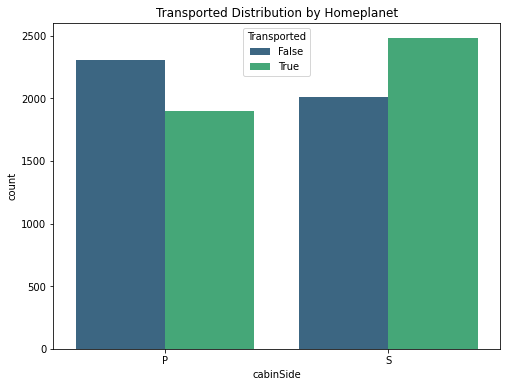

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabinSide', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

More people in Port (P) cabin side  were not transported to another dimension while more people in Starboard (S) cabin were transported to another dimension. 

Text(0.5, 1.0, 'Cabin Services by VIP')

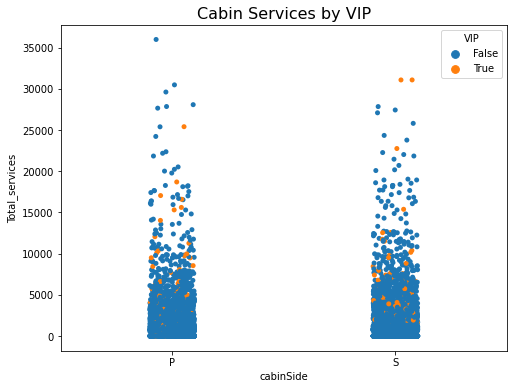

In [116]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df_titanic, x='cabinSide', y='Total_services', hue='VIP' ).set_title('Cabin Services by VIP', fontsize=16)

The higher the price of the service, the less people use the services both for VIP and non-VIP users. There seem to be no difference in paid services usage between passengers in both cabin sides.

In [117]:
Cabin_Deck = df_titanic['cabinNum'].value_counts()
Cabin_Deck

600.367671     199
82.000000       28
86.000000       22
19.000000       22
56.000000       21
              ... 
1644.000000      1
1515.000000      1
1639.000000      1
1277.000000      1
1894.000000      1
Name: cabinNum, Length: 1818, dtype: int64

In [118]:
CabinNum_Trans = df_titanic[['cabinNum', 'Transported']]
CabinNum_Trans

,cabinNum,Transported
0,0.0,False
1,0.0,True
2,0.0,False
3,0.0,False
4,1.0,True
...,...,...
8688,98.0,False
8689,1499.0,False
8690,1500.0,True
8691,608.0,False


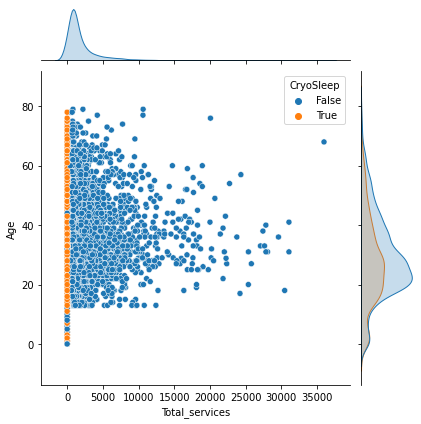

In [119]:
sns.jointplot(data=df_titanic, x='Total_services', y='Age', hue='CryoSleep')
plt.show()

People who used the cryosleep hardly used any of the paid services and the price passengers for these paid services range as high as 35000. People within the age range 20 - 40 years tend to use the paid services more

In [120]:
df_titanic.passengerGroup.value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: passengerGroup, Length: 6217, dtype: int64

In [121]:
df_titanic.passengerGroup.unique()

array([   1,    2,    3, ..., 9278, 9279, 9280])

In [122]:
len(df_titanic.passengerGroup.unique())

6217

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Groups size')

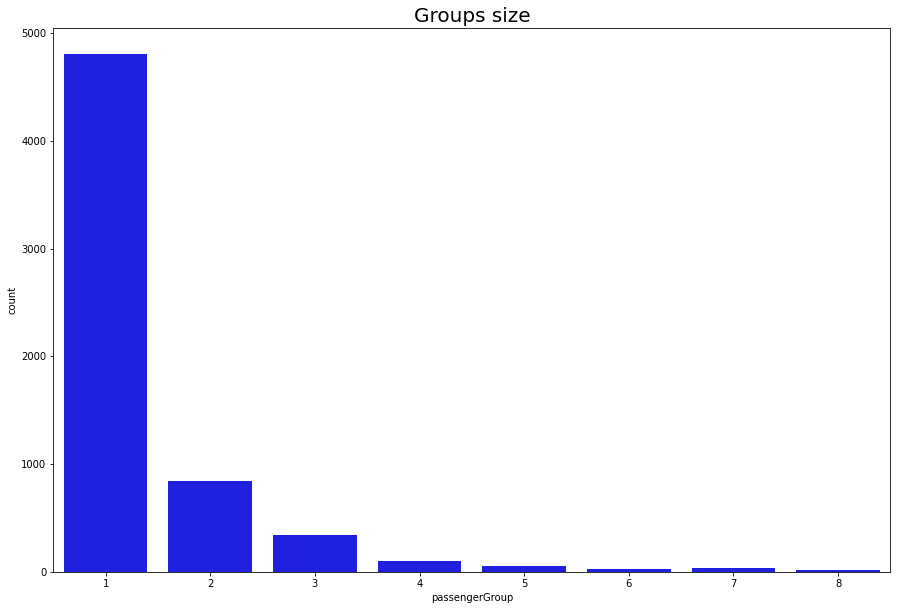

In [123]:
plt.figure(figsize=(15, 10))
sns.countplot(df_titanic.passengerGroup.value_counts(), color='b').set_title('Groups size', fontsize=20)

Most passengers travelled alone and only a few number travelled in groups from 2 to 8 persons. 

In [124]:
# Exploring the Europa home planet as a lot of residents from this location were transported to another dimension. 
df_europa = df_titanic[df_titanic['HomePlanet'] == 'Europa']
df_europa.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0.0,P,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0.0,S,10383.0


In [125]:
europa_cabinD = df_europa[['cabinDeck', 'HomePlanet']]
europa_cabinD

,cabinDeck,HomePlanet
0,B,Europa
2,A,Europa
3,A,Europa
9,B,Europa
10,B,Europa
...,...,...
8686,A,Europa
8687,A,Europa
8688,A,Europa
8691,E,Europa


In [126]:
europa_cabindeck= europa_cabinD.groupby('cabinDeck')
europa_cabindeck.size()

cabinDeck
A    252
B    766
C    734
D    186
E    128
F     61
T      4
dtype: int64

In [127]:
europa_cabinS = df_europa[['cabinSide', 'HomePlanet']]
europa_cabinS

,cabinSide,HomePlanet
0,P,Europa
2,S,Europa
3,S,Europa
9,P,Europa
10,P,Europa
...,...,...
8686,P,Europa
8687,P,Europa
8688,P,Europa
8691,S,Europa


In [128]:
europa_cabinside = europa_cabinS.groupby('cabinSide')
europa_cabinside.size()

cabinSide
P     955
S    1176
dtype: int64

Text(0, 0.5, 'cabinSide')

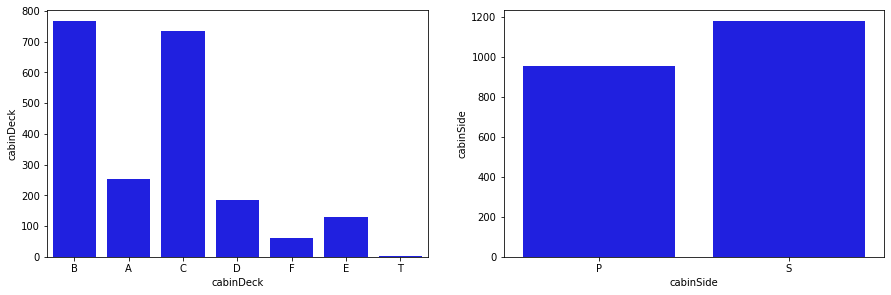

In [129]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.countplot(x='cabinDeck', data= df_europa, color= 'b')
fig.set_ylabel('cabinDeck')

plt.subplot(2,2,2)
fig = sns.countplot(x='cabinSide', data= df_europa, color= 'b')
fig.set_ylabel('cabinSide')


Most Europans stayed in cabins B and C and only a few of them stayed in cabin deck T. Also, most Europans stayed in starboard cabin side

Our conclusion is that the chance to be transported to another dimension is quite random among he passengers as nothing from the given columns especially influenced their transportation to locations other than their desired ones. 

# Data Preprocessing

In [130]:
# Checking the dataset for training 
df_titanic.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0.0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,0.0,S,736.0


In [131]:
# Checking the columns in the train dataset
df_titanic.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'passengerGroup', 'cabinDeck', 'cabinNum', 'cabinSide',
       'Total_services'],
      dtype='object')

In [132]:
# Checking the columns in the test dataset
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'passengerGroup', 'cabinDeck', 'cabinNum', 'cabinSide',
       'Total_services'],
      dtype='object')

In [133]:
# Checking the shape of the dataset
print(df_titanic.shape)
print(df_test.shape)

(8693, 18)
(4277, 17)


In [134]:
# Checking for Cardinality

unique_dic = []

for col in df_test.columns:

  unique_num_train = len(df_train[col].unique())
  unique_num_test = len(df_test[col].unique())
  unique_dic.append({'Total_Unique_Train' : unique_num_train,
                     'Cardinality%_Train': (unique_num_train/8693)*100,
                     'Total_Unique_Test' : unique_num_test,
                     'Cardinality%_Test': (unique_num_test/4277)*100})


unique_df = pd.DataFrame(unique_dic, index = df_test.columns).sort_values(by = 'Cardinality%_Train', ascending = False)
unique_df

,Total_Unique_Train,Cardinality%_Train,Total_Unique_Test,Cardinality%_Test
PassengerId,8693,100.000000,4277,100.000000
Name,8474,97.480732,4177,97.661913
passengerGroup,6217,71.517313,3063,71.615618
Total_services,2336,26.872196,1437,33.598317
cabinNum,1818,20.913379,1506,35.211597
FoodCourt,1507,17.335787,902,21.089549
Spa,1327,15.265156,833,19.476268
VRDeck,1306,15.023582,796,18.611176
RoomService,1273,14.643966,842,19.686696
ShoppingMall,1115,12.826412,715,16.717325


**PassengerId and Name** are highly cardinal and they are not needed in the dataset do we drop them. 

We will also drop the **Total_services** column as it is already represented in other columns in the datase

Although **passengerGroup, cabinNum, FoodCourt, Spa, VRDeck, RoomService and Shopping mall** are highly cardinal, we will not drop them cos they are numerical variables and can be standardized

In [135]:
# Dropping PassengerId and Name in train
df_titanic = df_titanic.drop(['PassengerId', 'Name','Total_services' ], axis=1)

In [136]:
df_titanic.shape

(8693, 15)

In [137]:
df_test.shape

(4277, 17)

In [138]:
# Dropping PassengerId and Name in test
Titanic_df_test = df_test.drop(['PassengerId', 'Name', 'Total_services'], axis=1)

In [139]:
Titanic_df_test.shape

(4277, 14)

In [140]:
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'passengerGroup', 'cabinDeck', 'cabinNum', 'cabinSide',
       'Total_services'],
      dtype='object')

In [141]:
# Checking columns to ensure we have the right columns
df_titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'passengerGroup', 'cabinDeck', 'cabinNum', 'cabinSide'],
      dtype='object')

In [142]:
# Checking columns to ensure we have the right columns
Titanic_df_test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'passengerGroup',
       'cabinDeck', 'cabinNum', 'cabinSide'],
      dtype='object')

In [143]:
# Checking the shape of the dataset
print(df_titanic.shape)
print(Titanic_df_test.shape)

(8693, 15)
(4277, 14)


In [144]:
# Getting categorical variables
titanic_categorical = [var for var in df_titanic.columns if df_titanic[var].dtype=='O']
print('There are {} categorical variabes \n'.format(len(titanic_categorical)))

print('They are: ', titanic_categorical)

There are 4 categorical variabes 

They are:  ['HomePlanet', 'Destination', 'cabinDeck', 'cabinSide']


In [145]:
# Getting numerical variables
titanic_numerical = [var for var in df_titanic.columns if df_titanic[var].dtype!='O']
print('There are {} numerical variabes \n'.format(len(titanic_numerical)))

print('They are: ', titanic_numerical)

There are 11 numerical variabes 

They are:  ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'passengerGroup', 'cabinNum']


Cryosleep, VIP and Transported are in the boolean form, we are going to convert to string so we can get dummies for them

In [146]:
# Converting bools to string
col1 = []
#col2 = []
def Convert_bool(df):
  col1 = ['CryoSleep', 'VIP', 'Transported']
  #col2 = ['CryoSleep', 'VIP']
  for i in col1:
    df[i] = df[i].astype('category')
  #for a in col2:
    #df[a] = df[a].astype('category')
  return df

In [147]:
Convert_bool(df_titanic)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,A,98.0,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,G,1500.0,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,E,608.0,S


In [148]:
# Checking info to ensure conversion was done
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      8693 non-null   object  
 1   CryoSleep       8693 non-null   category
 2   Destination     8693 non-null   object  
 3   Age             8693 non-null   float64 
 4   VIP             8693 non-null   category
 5   RoomService     8693 non-null   float64 
 6   FoodCourt       8693 non-null   float64 
 7   ShoppingMall    8693 non-null   float64 
 8   Spa             8693 non-null   float64 
 9   VRDeck          8693 non-null   float64 
 10  Transported     8693 non-null   category
 11  passengerGroup  8693 non-null   int64   
 12  cabinDeck       8693 non-null   object  
 13  cabinNum        8693 non-null   float64 
 14  cabinSide       8693 non-null   object  
dtypes: category(3), float64(7), int64(1), object(4)
memory usage: 840.9+ KB


In [149]:
#Convert_bool(df_test)

In [150]:
# Converting bools to string
def Convertbool2(df):
  col2 = ['CryoSleep', 'VIP']
  for a in col2:
   df[a] = df[a].astype('category')
  return df

In [151]:
Convertbool2(Titanic_df_test)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinDeck,cabinNum,cabinSide
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,13,G,3.000000,S
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,18,F,4.000000,S
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,19,C,0.000000,S
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,21,C,1.000000,S
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,23,F,5.000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,9266,G,1496.000000,S
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,9269,F,610.178836,S
4274,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,9271,D,296.000000,P
4275,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,9273,D,297.000000,P


In [152]:
# Checking info to ensure conversion was done
Titanic_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      4277 non-null   object  
 1   CryoSleep       4277 non-null   category
 2   Destination     4277 non-null   object  
 3   Age             4277 non-null   float64 
 4   VIP             4277 non-null   category
 5   RoomService     4277 non-null   float64 
 6   FoodCourt       4277 non-null   float64 
 7   ShoppingMall    4277 non-null   float64 
 8   Spa             4277 non-null   float64 
 9   VRDeck          4277 non-null   float64 
 10  passengerGroup  4277 non-null   int64   
 11  cabinDeck       4277 non-null   object  
 12  cabinNum        4277 non-null   float64 
 13  cabinSide       4277 non-null   object  
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 409.7+ KB


In [153]:
#df_titanic['CryoSleep'] = int([df_titanic['CryoSleep']])

In [154]:
# Checking data types of the converted columns
df_titanic['CryoSleep'].dtype

CategoricalDtype(categories=[False, True], ordered=False)

In [155]:
Titanic_df_test['CryoSleep'].dtype

CategoricalDtype(categories=[False, True], ordered=False)

In [156]:
print(df_titanic['VIP'].dtype)
print(Titanic_df_test['VIP'].dtype)

category
category


In [157]:
df_titanic['Transported'].dtype

CategoricalDtype(categories=[False, True], ordered=False)

In [158]:
Titanic_df_test.shape

(4277, 14)

We tried splitting our train data set before preprocessing. However, one of the columns for the cabin deck contains such little value that it was not included in our X_test after the split. So, we will do the preprocessing before splitting. 

In [159]:
print(len(df_titanic['HomePlanet'].unique()))
print(len(df_titanic['CryoSleep'].unique()))
print(len(df_titanic['Destination'].unique()))
print(len(df_titanic['VIP'].unique()))
print(len(df_titanic['cabinDeck'].unique()))
print(len(df_titanic['cabinSide'].unique()))

3
2
3
2
8
2


In [160]:
# Getting dummies for the categorical variables

HomePlanet_dummy = pd.get_dummies(df_titanic.HomePlanet, drop_first=True)

CryoSleep_dummy = pd.get_dummies(df_titanic.CryoSleep, drop_first=True)

Destination_dummy = pd.get_dummies(df_titanic.Destination, drop_first=True)

VIP_dummy = pd.get_dummies(df_titanic.VIP, drop_first=True)

cabinDeck_dummy = pd.get_dummies(df_titanic.cabinDeck, drop_first=True)

cabinSide_dummy = pd.get_dummies(df_titanic.cabinSide, drop_first=True)

In [161]:
#df_titanic['Transported'] = df_titanic['Transported'].apply(lambda x: int(x))

In [162]:
# Importing LabelEncoder to encode the Transported columns
from sklearn.preprocessing import LabelEncoder

In [163]:
le_transported = LabelEncoder()

In [164]:
# Transforming the transported columns
df_titanic['Transported_n'] = le_transported.fit_transform(df_titanic['Transported'])

In [165]:
# Ensuring Transformation has been done
df_titanic.head(50)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Transported_n
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0.000000,P,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,F,0.000000,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,A,0.000000,S,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,A,0.000000,S,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,F,1.000000,S,1
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,5,F,0.000000,P,1
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,6,F,2.000000,S,1
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,6,G,0.000000,S,1
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,7,F,3.000000,S,1
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,8,B,1.000000,P,1


**True = 1**

**False = 0**

In [166]:
# Joining dummies to our train dataset
df_titanic = pd.concat([df_titanic, HomePlanet_dummy, CryoSleep_dummy, Destination_dummy, VIP_dummy, cabinDeck_dummy, cabinSide_dummy], axis = 1)
df_titanic.sample(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
7415,Europa,False,TRAPPIST-1e,31.0,False,0.0,910.0,58.0,1654.0,1217.0,...,1,0,1,0,0,0,0,0,0,1
455,Earth,True,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,1


In [167]:
# Dropping certain columns
df_titanic.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabinDeck', 'cabinSide','Transported' ], axis=1, inplace= True)
df_titanic.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Transported_n,Europa,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0.0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [168]:
# Assigning feature and target
X = df_titanic.drop(['Transported_n'], axis=1)
y = df_titanic['Transported_n']

In [169]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [170]:
#check the shapeof our split 

X_train.shape, X_test.shape

((6954, 22), (1739, 22))

In [171]:
y_test

1454    1
218     0
7866    0
7622    1
4108    0
       ..
3612    1
157     0
5025    1
4370    1
383     1
Name: Transported_n, Length: 1739, dtype: int64

In [172]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
5776,39.0,0.0,0.0,0.0,0.0,0.0,6118,391.0,0,1,...,1,0,0,0,0,1,0,0,0,0
220,43.0,0.0,888.0,0.0,0.0,0.0,234,50.0,0,0,...,1,0,0,0,0,0,1,0,0,0
2398,24.0,19.0,676.0,0.0,26.0,0.0,2580,412.0,0,0,...,1,0,0,0,0,0,0,1,0,1
5876,16.0,0.0,0.0,60.0,0.0,1963.0,6224,1191.0,0,0,...,1,0,0,0,0,0,1,0,0,1
192,21.0,367.0,281.0,0.0,0.0,146.0,213,46.0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,38.0,886.0,0.0,618.0,0.0,0.0,3130,588.0,0,1,...,1,0,0,0,0,0,1,0,0,1
7813,39.0,0.0,261.0,0.0,1831.0,1797.0,8339,246.0,1,0,...,1,0,0,0,1,0,0,0,0,1
905,24.0,0.0,32.0,8.0,0.0,0.0,978,203.0,0,0,...,1,0,0,0,0,0,1,0,0,0
5192,47.0,0.0,0.0,0.0,0.0,0.0,5538,1146.0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [173]:
len(X_test)

1739

In [174]:
len(y_test)

1739

In [175]:
X_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
1454,32.0,54.0,3782.0,0.0,21.0,5.0,1539,17.000000,1,0,...,0,0,0,0,0,0,0,0,0,1
218,27.0,0.0,0.0,0.0,0.0,0.0,232,36.000000,0,0,...,0,0,0,0,0,0,0,1,0,1
7866,24.0,86.0,669.0,1.0,0.0,0.0,8392,1610.000000,0,0,...,0,0,0,0,0,0,1,0,0,1
7622,38.0,0.0,0.0,0.0,0.0,0.0,8141,1310.000000,0,0,...,1,0,0,0,0,0,0,1,0,1
4108,32.0,192.0,0.0,441.0,18.0,0.0,4387,902.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,17.0,0.0,0.0,0.0,0.0,0.0,3883,150.000000,1,0,...,0,0,1,0,0,0,0,0,0,1
157,0.0,0.0,0.0,0.0,0.0,0.0,179,26.000000,0,0,...,1,0,0,0,0,0,0,1,0,0
5025,46.0,0.0,8221.0,0.0,1010.0,160.0,5367,209.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
4370,27.0,0.0,89.0,874.0,34.0,0.0,4652,600.367671,0,0,...,1,0,0,0,0,0,1,0,0,1


In [176]:
X_test.dtypes

Age               float64
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
passengerGroup      int64
cabinNum          float64
Europa              uint8
Mars                uint8
True                uint8
PSO J318.5-22       uint8
TRAPPIST-1e         uint8
True                uint8
B                   uint8
C                   uint8
D                   uint8
E                   uint8
F                   uint8
G                   uint8
T                   uint8
S                   uint8
dtype: object

In [177]:
X_train.dtypes

Age               float64
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
passengerGroup      int64
cabinNum          float64
Europa              uint8
Mars                uint8
True                uint8
PSO J318.5-22       uint8
TRAPPIST-1e         uint8
True                uint8
B                   uint8
C                   uint8
D                   uint8
E                   uint8
F                   uint8
G                   uint8
T                   uint8
S                   uint8
dtype: object

In [178]:
X_train.columns

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')

In [179]:
X_test.columns

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')

In [180]:
len(X_test)

1739

In [181]:
len(y_test)

1739

In [182]:
# Get column names to be used after standardization
cols_train = X_train.columns
print(cols_train)
print('............................')
len(cols_train)

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')
............................


22

In [183]:
# Get column names to be used after standardization
cols_test = X_test.columns
print(cols_test)
print('............................')
len(cols_test)

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')
............................


22

In [184]:
#feature scaling for standardization

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.fit_transform(X_test.values)

In [185]:
X_train = pd.DataFrame(X_train, columns=[cols_train])
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.659231,0.206441,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.544304,0.000000,0.029786,0.000000,0.000000,0.000000,0.025110,0.026399,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.303797,0.001326,0.022675,0.000000,0.001160,0.000000,0.277939,0.217529,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.202532,0.000000,0.000000,0.002554,0.000000,0.081341,0.670654,0.628828,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.265823,0.025616,0.009425,0.000000,0.000000,0.006050,0.022847,0.024287,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.481013,0.061841,0.000000,0.026307,0.000000,0.000000,0.337213,0.310454,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6950,0.493671,0.000000,0.008755,0.000000,0.081712,0.074462,0.898588,0.129884,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6951,0.303797,0.000000,0.001073,0.000341,0.000000,0.000000,0.105292,0.107181,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6952,0.594937,0.000000,0.000000,0.000000,0.000000,0.000000,0.596724,0.605069,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [186]:
X_test = pd.DataFrame(X_test, columns=[cols_train])
X_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,0.410256,0.006611,0.136421,0.000000,0.001131,0.000406,0.165301,0.009023,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346154,0.000000,0.000000,0.000000,0.000000,0.000000,0.024369,0.019108,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.307692,0.010529,0.024132,0.000093,0.000000,0.000000,0.904248,0.854565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.487179,0.000000,0.000000,0.000000,0.000000,0.000000,0.877184,0.695329,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.410256,0.023506,0.000000,0.041196,0.000969,0.000000,0.472396,0.478769,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,0.217949,0.000000,0.000000,0.000000,0.000000,0.000000,0.418050,0.079618,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018654,0.013800,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1736,0.589744,0.000000,0.296541,0.000000,0.054383,0.012984,0.578068,0.110934,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1737,0.346154,0.000000,0.003210,0.081644,0.001831,0.000000,0.500970,0.318666,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


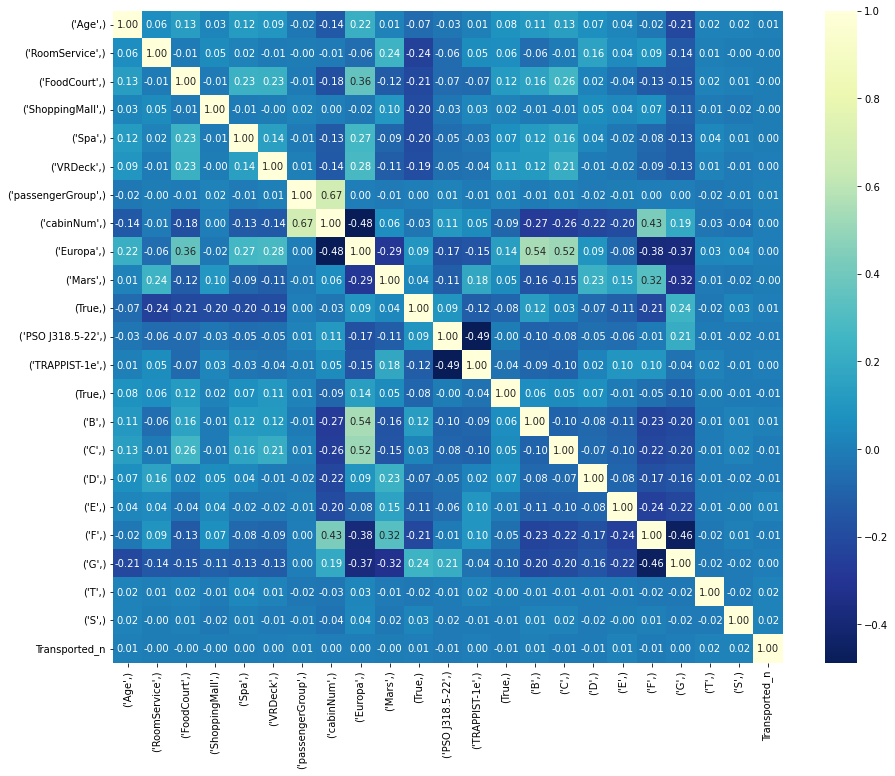

In [187]:
# correlation heatmap showing every column in the dataset after they have been encoded
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,12))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), cmap="YlGnBu_r", annot=True, fmt=".02f")

# Model Building and Training

For training our model, we will use: 

**Logistic Regression**

**Support Vector Machine**

**Random Forest**

**Decision Tree Classifier**

**Using Logistic Regression**

In [188]:
#Model training 

from sklearn.linear_model import LogisticRegression

titanic_model = LogisticRegression()

titanic_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [189]:
#test data
y_predicted = titanic_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [190]:
y_predicted

array([1, 1, 0, ..., 1, 0, 1])

In [191]:
# model accuracy metrics for logistic regression


print('Training set score: ', titanic_model.score(X_train, y_train))

print('Test set score: ', titanic_model.score(X_test, y_test))

Training set score:  0.769485188380788
Test set score:  0.7711328349626222


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [192]:
titanic_model.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7711328349626222

In [193]:
# Model training for logistic regression
from sklearn.linear_model import LogisticRegression

titanic_model1 = LogisticRegression(solver= 'liblinear', random_state=0, n_jobs=10)

titanic_model1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


LogisticRegression(n_jobs=10, random_state=0, solver='liblinear')

In [194]:
# model accuracy metrics for logistic regression


print('Training set score: ', titanic_model1.score(X_train, y_train))

print('Test set score: ', titanic_model1.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Training set score:  0.7696289905090595
Test set score:  0.7711328349626222


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [195]:
# Logistic regression score
titanic_model1.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7711328349626222

**Using Support Vector Machine**

In [196]:
# Importing libraries
from sklearn.svm import SVC


In [197]:
SVM_titanicmodel = SVC(kernel = 'rbf', gamma= 'auto')

In [198]:
SVM_titanicmodel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC(gamma='auto')

In [199]:
SVM_titanicmodel.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.721679125934445

In [200]:
SVM_titanicmodel1 = SVC(kernel = 'poly', class_weight='balanced', verbose=True, decision_function_shape='ovo')

In [201]:
SVM_titanicmodel1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[LibSVM]

SVC(class_weight='balanced', decision_function_shape='ovo', kernel='poly',
    verbose=True)

In [202]:
# Model accuracy for SVM
SVM_titanicmodel1.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7665324899367453

**Using Decision Tree Classifier**

In [203]:
# Importing needed libararies
from sklearn import tree
DT_titanicmodel = tree.DecisionTreeClassifier()

In [204]:
DT_titanicmodel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

In [205]:
DT_titanicmodel.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7596319723979299

In [206]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier

In [207]:
RC_titanicmodel1 = RandomForestClassifier()

In [208]:
RC_titanicmodel1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [209]:
print('Test set score: ', RC_titanicmodel1.score(X_test, y_test))
print('Train set score: ', RC_titanicmodel1.score(X_train, y_train))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Test set score:  0.80448533640023
Train set score:  0.9998561978717285


In [210]:
RC_titanicmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [211]:
RC_titanicmodel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(n_jobs=-1)

In [212]:
print('Test set score: ', RC_titanicmodel.score(X_test, y_test))
print('Train set score: ', RC_titanicmodel.score(X_train, y_train))

Test set score:  0.7998849913743531
Train set score:  0.9998561978717285


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [213]:
predicted = RC_titanicmodel1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [214]:
predicted

array([1, 1, 0, ..., 1, 1, 1])

Random Forest Classifier has the highest accuracy at 80% we will be using it for our df_test

# Validation Metrics

In [215]:
#check null accuracy 
y_test.value_counts()

1    896
0    843
Name: Transported_n, dtype: int64

In [216]:
null_acuracy =   896/(len(y_test))
null_acuracy

0.5152386428982174

In [217]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       843
           1       0.83      0.78      0.80       896

    accuracy                           0.80      1739
   macro avg       0.81      0.81      0.80      1739
weighted avg       0.81      0.80      0.80      1739



In [218]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, predicted)

In [219]:
cm

array([[704, 139],
       [201, 695]])

In [220]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  704
False positives (FP)=  139
False Negatives (FN)=  201
True Negatives (TN))=  695


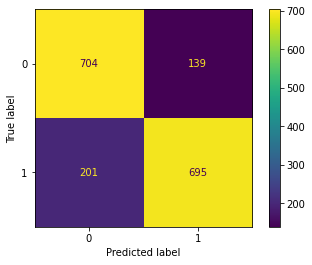

In [221]:
#visualze with heatmap

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RC_titanicmodel1.classes_)

disp.plot();

In [222]:
#probability of getting 1, i.e , Transported to another dimension
#probability of getting 0, i.e , Not Transported to another dimension

y_pred1 = RC_titanicmodel1.predict_proba(X_test.values)[:,1]
y_pred0 = RC_titanicmodel1.predict_proba(X_test.values)[:,0]

In [223]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

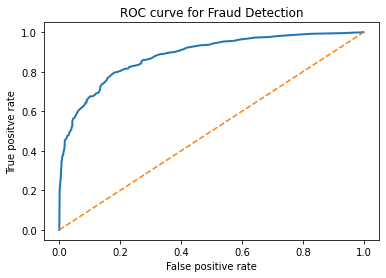

In [224]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Fraud Detection')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [225]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.882893259617014


Best Threshold=0.480000, G-Mean=0.808


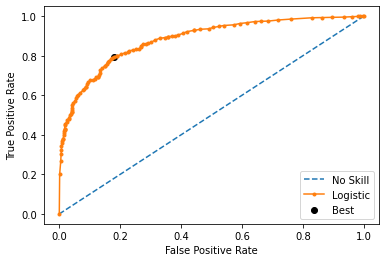

In [226]:
# Determine the best the optimal threshold
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot


# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

# Prediction of df_test


In [227]:
# Overview of test dataset
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3.0,S,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4.0,S,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0.0,S,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1.0,S,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5.0,S,645.0


In [228]:
# Checking the shape of the test dataset
df_test.shape

(4277, 17)

In [229]:
# Checking the new variable assigned to the test dataset
Titanic_df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinDeck,cabinNum,cabinSide
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,F,4.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,C,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,C,1.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,23,F,5.0,S


In [230]:
# Checking the shape of the new test dataset
Titanic_df_test.shape

(4277, 14)

In [231]:
# Columns present in the test dataset
Titanic_df_test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'passengerGroup',
       'cabinDeck', 'cabinNum', 'cabinSide'],
      dtype='object')

In [232]:
# Length of the columns
len(Titanic_df_test.columns)

14

In [233]:
# Ensuring all data types are numerical and categorical
Titanic_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      4277 non-null   object  
 1   CryoSleep       4277 non-null   category
 2   Destination     4277 non-null   object  
 3   Age             4277 non-null   float64 
 4   VIP             4277 non-null   category
 5   RoomService     4277 non-null   float64 
 6   FoodCourt       4277 non-null   float64 
 7   ShoppingMall    4277 non-null   float64 
 8   Spa             4277 non-null   float64 
 9   VRDeck          4277 non-null   float64 
 10  passengerGroup  4277 non-null   int64   
 11  cabinDeck       4277 non-null   object  
 12  cabinNum        4277 non-null   float64 
 13  cabinSide       4277 non-null   object  
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 409.7+ KB


In [234]:
print(len(Titanic_df_test['HomePlanet'].unique()))
print(len(Titanic_df_test['CryoSleep'].unique()))
print(len(Titanic_df_test['Destination'].unique()))
print(len(Titanic_df_test['VIP'].unique()))
print(len(Titanic_df_test['cabinDeck'].unique()))
print(len(Titanic_df_test['cabinSide'].unique()))

3
2
3
2
8
2


In [235]:
# Getting dummies for the categorical variables

TestHomePlanet_dummy = pd.get_dummies(Titanic_df_test.HomePlanet, drop_first=True)

TestCryoSleep_dummy = pd.get_dummies(Titanic_df_test.CryoSleep, drop_first=True)

TestDestination_dummy = pd.get_dummies(Titanic_df_test.Destination, drop_first=True)

TestVIP_dummy = pd.get_dummies(Titanic_df_test.VIP, drop_first=True)

TestcabinDeck_dummy = pd.get_dummies(Titanic_df_test.cabinDeck, drop_first=True)

TestcabinSide_dummy = pd.get_dummies(Titanic_df_test.cabinSide, drop_first=True)

In [236]:
Titanic_df_test.shape

(4277, 14)

In [237]:
# Joining dummies to our train dataset
Titanic_df_test = pd.concat([Titanic_df_test, TestHomePlanet_dummy, TestCryoSleep_dummy, TestDestination_dummy, TestVIP_dummy, TestcabinDeck_dummy, TestcabinSide_dummy], axis = 1)
Titanic_df_test.sample(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
3668,Mars,False,TRAPPIST-1e,38.0,False,918.0,0.0,796.0,662.0,7.0,...,1,0,0,0,1,0,0,0,0,0
799,Europa,True,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1


In [238]:
Titanic_df_test.shape

(4277, 28)

In [239]:
# Dropping certain columns
Titanic_df_test.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabinDeck', 'cabinSide' ], axis=1, inplace= True)
Titanic_df_test.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,27.0,0.0,0.0,0.0,0.0,0.0,13,3.0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,18,4.0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [240]:
Titanic_df_test.shape

(4277, 22)

In [241]:
# Checking the columns in the dataset
Titanic_df_test.columns

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')

In [242]:
Titanic_df_test.shape

(4277, 22)

In [243]:
# Get column names to be used after standardization
cols_dftest = Titanic_df_test.columns
print(cols_dftest)
print('............................')
len(cols_dftest)

Index([           'Age',    'RoomService',      'FoodCourt',   'ShoppingMall',
                  'Spa',         'VRDeck', 'passengerGroup',       'cabinNum',
               'Europa',           'Mars',             True,  'PSO J318.5-22',
          'TRAPPIST-1e',             True,              'B',              'C',
                    'D',              'E',              'F',              'G',
                    'T',              'S'],
      dtype='object')
............................


22

In [244]:
Titanic_df_test.shape

(4277, 22)

In [245]:
#feature scaling for standardization

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

Titanic_df_test = scaler.fit_transform(Titanic_df_test.values)

In [246]:
Titanic_df_test

array([[3.41772152e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.40506329e-01, 0.00000000e+00, 3.56111265e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.92405063e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.62761344e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.62761344e-01, 0.00000000e+00, 1.06042021e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.44303797e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [247]:
# Checking the scaled dataset
Titanic_df_test = pd.DataFrame(Titanic_df_test, columns=[cols_dftest])
Titanic_df_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passengerGroup,cabinNum,Europa,Mars,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001587,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.240506,0.000000,0.000356,0.00000,0.142260,0.000000,0.000540,0.002116,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,0.000648,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.481013,0.000000,0.263206,0.00000,0.009121,0.026266,0.000864,0.000529,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.253165,0.000865,0.000000,0.07658,0.000000,0.000000,0.001079,0.002646,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.00000,0.000000,0.000000,0.998813,0.791534,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4273,0.531646,0.000000,0.033514,0.00205,0.000504,0.006466,0.999136,0.322846,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4274,0.362761,0.000000,0.000000,0.00000,0.000000,0.000000,0.999352,0.156614,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4275,0.362761,0.000000,0.106042,0.00000,0.000000,0.023482,0.999568,0.157143,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [248]:
# Getting the result
RC_titanicmodel1.predict(Titanic_df_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 0])

In [249]:
# Prediction results
result = pd.DataFrame(RC_titanicmodel1.predict(Titanic_df_test), index = df_test['PassengerId'])
result

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,0
PassengerId,
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,1
...,...
9266_02,0
9269_01,0
9271_01,1


In [250]:
def CallBool(df):
  for i in len(df):
    if i == 1:
      return True
    else:
      return False

In [251]:
#CallBool(new_df_test)

In [252]:
#idx = pd.Index(df_test.PassengerId)
#y_predicted = RC_titanicmodel1.predict(Titanic_df_test)
#submit = pd.Series(data = y_predicted, index = idx, name = 'Transported')

In [253]:
#submit

In [254]:
y_predicted = RC_titanicmodel1.predict(Titanic_df_test)
final_result = pd.DataFrame({'Trasnported': y_predicted.astype(bool)})
final_result = pd.concat([df_test['PassengerId'], final_result], axis= 1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [255]:
final_result

,PassengerId,Trasnported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [256]:
result.value_counts()

0    2144
1    2133
dtype: int64